<a href="https://colab.research.google.com/github/ahya-ulumudin/H8_084_15/blob/main/Pertemuan%2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pengenalan Deep Learning dan Neural Network**

---



In [1]:
import pandas as pd

# TODO: change the weight1, weight2, and bias
weight1 = 0
weight2 = 0
bias = 0


In [8]:
# DON'T CHANGE BELOW SCRIPT
# (Input, Target)
test_inputs = [(1, 1), (0, 1), (1, 0), (0, 0)]
targets = [True, False, False, False]
outputs = []

# Generate results
for inputs, target in zip(test_inputs, targets):
    linear_combination = weight1*inputs[0] + weight2*inputs[1] + bias
    output = int(linear_combination > 0)
    is_correct = 'Benar' if output == target else 'Salah'
    outputs.append(
        [inputs[0], inputs[1], linear_combination, output, is_correct]
    )


In [9]:
# Show results
num_wrong = len([output[4] for output in outputs if output[4] == "Salah"])
output_df = pd.DataFrame(
    outputs,
    columns=[
        'Input X1', 'Input X2', 'Linear Combination',
        'Activation Output', 'Is Correct'
    ]
)

In [10]:
if not num_wrong:
    print("Nice! Perceptron bekerja sesuai harapan.\n")
else:
    print(f"Ada {num_wrong} kesalahan. Terus mencoba.\n")
print(output_df.to_string(index=False))

Ada 1 kesalahan. Terus mencoba.

 Input X1  Input X2  Linear Combination  Activation Output Is Correct
        1         1                   0                  0      Salah
        0         1                   0                  0      Benar
        1         0                   0                  0      Benar
        0         0                   0                  0      Benar


1. Fungsi Visualisasi

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter(
        [s[0][0] for s in rejected],
        [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k'
    )
    plt.scatter(
        [s[0][0] for s in admitted],
        [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k'
    )


def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

2. Load Data

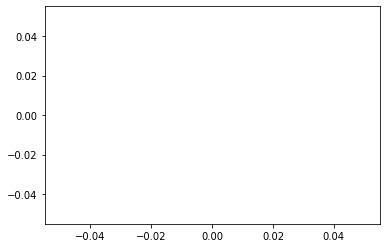

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/stefkwan-h8/dataset/main/student_data.csv', header=None)

X = np.array(data[[0,1]])
y = np.array(data[2])

plot_points(X,y)
plt.show()

3. Forward Propagation dengan Sigmoid

In [13]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1+np.exp(-x))


# Output (prediction) formula
def output_formula_sigmoid(features, weights, bias):
    y_pred = sigmoid(np.matmul(features, weights) + bias)
    return y_pred


# Error (log-loss) formula
def error_formula(y, output):
    error = -( y*np.log10(output) + (1-y)*(np.log10(1-output)) )
    return error    


# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula_sigmoid(x, weights, bias)
    new_weights = weights + learnrate*(y-output)*x
    new_bias = bias + learnrate*(y-output)
    return new_weights, new_bias

4. Fungsi untuk Pelatihan

In [14]:
np.random.seed(44)


def train(features, targets, epochs, learning_rate, graph_lines=False):
    n_records, n_features = features.shape
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    errors = []    
    last_loss = None
    bias = 0

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)

        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)

        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

5. Jalankan Training

In [15]:
epochs = 100
learnrate = 0.01

train(X, y, epochs, learnrate, True)

NameError: ignored